TO-DO LIST:
*   Import stocks using Yahoo Finance API / Stock index
*   Create GAN step that's modular (able to be turned off)
*   Create Reinforcement Learning Algorithms (DO THIS BEFORE GAN)
*   Write report




In [ ]:
!pip install ta
!pip install stable-baselines3[extra]
!pip install PyPortfolioOpt

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=c48e19dd856b2d5834d5e02352b1baa60a864dd522b9db38cdcb49e067203b8e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 51.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.6 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=c1c7f908464257cdc6f595202a59df3

## Data download

1. Import required libraries and install the Yahoo Finance API

2. Obtain data from a stock index (for this example it's the FTSE 100)

In [ ]:
import pandas as pd
import numpy as np
#from config import config
import matplotlib.pylab as plt

import yfinance as yf
from pandas_datareader import data as pdr

%matplotlib inline

In [ ]:
DATA_SAVE_DIR = f"datasets"
TRAINED_MODEL_DIR = f"trained_models"
TENSORBOARD_LOG_DIR = f"tensorboard_log"
RESULTS_DIR = f"results"

In [ ]:
import os
if not os.path.exists("./" + DATA_SAVE_DIR):
    os.makedirs("./" + DATA_SAVE_DIR)
if not os.path.exists("./" + TRAINED_MODEL_DIR):
    os.makedirs("./" + TRAINED_MODEL_DIR)
if not os.path.exists("./" + TENSORBOARD_LOG_DIR):
    os.makedirs("./" + TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + RESULTS_DIR):
    os.makedirs("./" + RESULTS_DIR)

In [ ]:
# 20 stocks selected out of DOW 30 index by autoencoder
list_of_stocks = ['JNJ', 'PG', 'MMM', 'KO', 'IBM', 'VZ', 'MCD', 'PFE', 'RTX', 'WMT',
       'MRK', 'V', 'DIS', 'MSFT', 'XOM', 'HD', 'TRV', 'INTC', 'AXP', 'NKE']

In [ ]:
tickers = yf.Tickers(" ".join(list_of_stocks))
data = tickers.history(start='2008-01-01', end="2021-01-01", interval="1d")
data

[*********************100%%**********************]  20 of 20 completed


Close                                                 \
                   AXP         DIS          HD         IBM       INTC   
Date                                                                    
2008-01-02   39.587997   27.012501   17.372110   58.999580  15.657759   
2008-01-03   39.099369   26.953121   17.179159   59.117962  15.237765   
2008-01-04   38.114326   26.410154   16.606968   56.993305  14.002429   
2008-01-07   38.284950   26.435602   16.879753   56.384666  14.132139   
2008-01-08   37.191322   25.909609   16.460583   54.998283  13.749186   
...                ...         ...         ...         ...        ...   
2020-12-24  112.843559  173.729996  251.855103  103.016937  43.122368   
2020-12-28  113.814758  178.860001  250.302643  103.124359  43.122368   
2020-12-29  113.603226  177.300003  247.457962  102.281647  45.247795   
2020-12-30  114.843681  181.169998  246.593369  102.727783  44.661472   
2020-12-31  116.266853  181.179993  246.928101  104.000099  45.641731   

                                                                      ...  \
                   JNJ         KO         MCD         MMM        MRK  ...   
Date                                                                  ...   
2008-01-02   41.183601  18.605780   36.937489   50.777534  31.142809  ...   
2008-01-03   41.196102  18.800705   36.829422   50.771385  31.115662  ...   
2008-01-04   41.139851  18.837252   36.269958   50.194324  30.860535  ...   
2008-01-07   41.777218  19.281918   36.892998   49.795277  31.441383  ...   
2008-01-08   41.827206  19.361099   36.289017   49.242718  32.385921  ...   
...                ...        ...         ...         ...        ...  ...   
2020-12-24  140.646606  48.779110  197.656448  153.019653  70.049309  ...   
2020-12-28  141.310745  49.436310  200.115601  153.186249  70.320274  ...   
2020-12-29  142.187088  49.408932  198.890701  152.432205  71.168129  ...   
2020-12-30  143.948959  49.691879  197.815384  152.660156  70.442642  ...   
2020-12-31  145.175858  50.056999  200.639191  153.256393  71.500290  ...   

              Volume                                                   \
                MSFT       NKE       PFE        PG       RTX      TRV   
Date                                                                    
2008-01-02  63004200   9781600  48466820  12255300   6773748  2341400   
2008-01-03  49599600  10636000  47926223  11162800   6921366  2098800   
2008-01-04  72090800  22335200  44292453  10049000   8803537  3048900   
2008-01-07  80164300  20808400  50715107  11916000   9297080  3130300   
2008-01-08  79148300  16714400  54701441  17169100  13110680  4684600   
...              ...       ...       ...       ...       ...      ...   
2020-12-24  10550600   1821900  14790100   2588200   1758600   416800   
2020-12-28  17933500   4081500  26993700   3714700   2938000  1100300   
2020-12-29  17403200   3232400  23152100   5139300   3670100   859000   
2020-12-30  20272300   3052100  24889800   3261400   5015500  1253800   
2020-12-31  20942100   2949900  30796500   4076400   4177000   970200   

                                                     
                    V        VZ       WMT       XOM  
Date                                                 
2008-01-02        NaN  10865660  19918600  23351900  
2008-01-03        NaN   9017975  19801000  19160600  
2008-01-04        NaN  11886820  20351200  24730900  
2008-01-07        NaN  16094216  20326500  28937500  
2008-01-08        NaN  37362464  19017100  21764500  
...               ...       ...       ...       ...  
2020-12-24  3367900.0   7751100   3018200   8039000  
2020-12-28  5816200.0  15355600   6448300  23877500  
2020-12-29  6093400.0  15686100   5979400  20287700  
2020-12-30  8875100.0  18259800   6250400  23807300  
2020-12-31  5922200.0  12906300   5938000  22786500  

[3274 rows x 140 columns]

DATA CLEANING

In [ ]:
# Check for missing values
data.isna().sum()

Close   AXP      0
        DIS      0
        HD       0
        IBM      0
        INTC     0
                ..
Volume  TRV      0
        V       53
        VZ       0
        WMT      0
        XOM      0
Length: 140, dtype: int64

In [ ]:
data_filtered = data[data["Volume"]["V"].notna()]
data_filtered

Close                                                 \
                   AXP         DIS          HD         IBM       INTC   
Date                                                                    
2008-03-19   32.576340   26.503473   18.019989   66.155212  13.105649   
2008-03-20   35.663334   27.063406   18.839083   66.941597  13.515786   
2008-03-24   36.772480   27.182180   19.644743   67.354538  13.751914   
2008-03-25   36.850029   27.216122   19.309050   66.737923  13.838921   
2008-03-26   35.182430   26.944635   18.906223   66.138245  13.584143   
...                ...         ...         ...         ...        ...   
2020-12-24  112.843559  173.729996  251.855103  103.016937  43.122368   
2020-12-28  113.814758  178.860001  250.302643  103.124359  43.122368   
2020-12-29  113.603226  177.300003  247.457962  102.281647  45.247795   
2020-12-30  114.843681  181.169998  246.593369  102.727783  44.661472   
2020-12-31  116.266853  181.179993  246.928101  104.000099  45.641731   

                                                                      ...  \
                   JNJ         KO         MCD         MMM        MRK  ...   
Date                                                                  ...   
2008-03-19   40.808899  18.379065   34.347515   49.095860  23.541180  ...   
2008-03-20   41.123409  18.710112   34.833988   48.175339  23.743792  ...   
2008-03-24   40.815205  18.753025   35.698135   48.583084  24.231138  ...   
2008-03-25   40.601353  18.823523   35.973370   48.793159  24.461145  ...   
2008-03-26   40.695690  18.743826   35.589302   48.595444  24.477568  ...   
...                ...        ...         ...         ...        ...  ...   
2020-12-24  140.646606  48.779110  197.656448  153.019653  70.049309  ...   
2020-12-28  141.310745  49.436310  200.115601  153.186249  70.320274  ...   
2020-12-29  142.187088  49.408932  198.890701  152.432205  71.168129  ...   
2020-12-30  143.948959  49.691879  197.815384  152.660156  70.442642  ...   
2020-12-31  145.175858  50.056999  200.639191  153.256393  71.500290  ...   

              Volume                                                   \
                MSFT       NKE       PFE        PG       RTX      TRV   
Date                                                                    
2008-03-19  61442100  20753600  48320946  15093900   9691947  3956100   
2008-03-20  60170200  43300400  57742441  16523000  10182471  6908900   
2008-03-24  48294700  29827600  37655731  10100000   6862732  5345300   
2008-03-25  49149000  20459600  46445142  10581200   7347536  3225800   
2008-03-26  45868100  20653600  33432775   8431200   6729892  2990400   
...              ...       ...       ...       ...       ...      ...   
2020-12-24  10550600   1821900  14790100   2588200   1758600   416800   
2020-12-28  17933500   4081500  26993700   3714700   2938000  1100300   
2020-12-29  17403200   3232400  23152100   5139300   3670100   859000   
2020-12-30  20272300   3052100  24889800   3261400   5015500  1253800   
2020-12-31  20942100   2949900  30796500   4076400   4177000   970200   

                                                       
                      V        VZ       WMT       XOM  
Date                                                   
2008-03-19  708486000.0  20761899  25829900  35073600  
2008-03-20  198985200.0  19425705  44533300  44962400  
2008-03-24  149566400.0  13063730  22246400  22339200  
2008-03-25   87092000.0  15571050  20327500  27080200  
2008-03-26   43111600.0  19511292  19226400  23024000  
...                 ...       ...       ...       ...  
2020-12-24    3367900.0   7751100   3018200   8039000  
2020-12-28    5816200.0  15355600   6448300  23877500  
2020-12-29    6093400.0  15686100   5979400  20287700  
2020-12-30    8875100.0  18259800   6250400  23807300  
2020-12-31    5922200.0  12906300   5938000  22786500  

[3221 rows x 140 columns]

In [ ]:
df_close = data_filtered["Close"]
df_close.reset_index(inplace=True)
df_close.rename({"Date":"date"}, axis=1, inplace=True)
df_close

<ipython-input-14-7b6a52a1cd61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.rename({"Date":"date"}, axis=1, inplace=True)


,date,AXP,DIS,HD,IBM,INTC,JNJ,KO,MCD,MMM,...,MSFT,NKE,PFE,PG,RTX,TRV,V,VZ,WMT,XOM
0,2008-03-19,32.576340,26.503473,18.019989,66.155212,13.105649,40.808899,18.379065,34.347515,49.095860,...,20.906857,12.668506,10.468346,42.673054,29.578522,31.691061,12.652097,14.906781,36.084751,47.729343
1,2008-03-20,35.663334,27.063406,18.839083,66.941597,13.515786,41.123409,18.710112,34.833988,48.175339,...,21.315937,13.783121,10.458192,43.654770,29.686052,32.633392,14.409950,15.326874,37.825733,48.051582
2,2008-03-24,36.772480,27.182180,19.644743,67.354538,13.751914,40.815205,18.753025,35.698135,48.583084,...,21.308638,14.153981,10.468346,44.032330,30.258183,32.565117,13.375392,15.687554,38.109966,48.588612
3,2008-03-25,36.850029,27.216122,19.309050,66.737923,13.838921,40.601353,18.823523,35.973370,48.793159,...,21.286718,14.008502,10.554695,43.761749,30.180756,32.612915,14.163627,15.657850,37.697823,48.164635
4,2008-03-26,35.182430,26.944635,18.906223,66.138245,13.584143,40.695690,18.743826,35.589302,48.595444,...,20.863028,13.578224,10.508984,43.824684,29.944162,32.469505,14.322618,15.335352,37.591232,48.763878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,2020-12-24,112.843559,173.729996,251.855103,103.016937,43.122368,140.646606,48.779110,197.656448,153.019653,...,216.924286,137.274857,33.230705,127.841316,65.320534,130.326874,204.246613,49.715870,137.487106,36.450306
3217,2020-12-28,113.814758,178.860001,250.302643,103.124359,43.122368,141.310745,49.436310,200.115601,153.186249,...,219.076477,138.079483,32.829475,128.732468,65.655174,130.985580,208.092758,49.834156,139.135071,36.572983
3218,2020-12-29,113.603226,177.300003,247.457962,102.281647,45.247795,142.187088,49.408932,198.890701,152.432205,...,218.287659,137.245758,33.034546,128.491119,65.385605,130.195114,209.795609,49.690517,138.253571,36.161163
3219,2020-12-30,114.843681,181.169998,246.593369,102.727783,44.661472,143.948959,49.691879,197.815384,152.660156,...,215.882233,137.255463,32.758144,127.887733,66.333763,130.882095,213.700485,49.124416,138.138626,36.450306


### Converting dataframe to a format used by RL implementation

In [ ]:
dfs = []
for cols in list(data_filtered.columns):
    df_temp = pd.DataFrame()
    df_temp[cols[0]] = data_filtered[cols[0]][cols[1]]
    df_temp["tic"] = cols[1]
    dfs.append(df_temp)

dfs1 = []
for i in range(0, len(dfs), len(list_of_stocks)):
    df_temp = pd.concat(dfs[i:(int(i/len(list_of_stocks)) + 1)*len(list_of_stocks)])
    dfs1.append(df_temp)

new_data = pd.concat(dfs1, axis=1)
new_data

,Close,tic,Dividends,tic,High,tic,Low,tic,Open,tic,Stock Splits,tic,Volume,tic
Date,,,,,,,,,,,,,,
2008-03-19,32.576340,AXP,0.0,AXP,34.499895,AXP,32.514288,AXP,34.282720,AXP,0.0,AXP,14098300.0,AXP
2008-03-20,35.663334,AXP,0.0,AXP,35.779679,AXP,32.739219,AXP,32.739219,AXP,0.0,AXP,17558800.0,AXP
2008-03-24,36.772480,AXP,0.0,AXP,37.811820,AXP,35.872753,AXP,35.880508,AXP,0.0,AXP,13441300.0,AXP
2008-03-25,36.850029,AXP,0.0,AXP,37.486046,AXP,36.307093,AXP,36.725929,AXP,0.0,AXP,9942200.0,AXP
2008-03-26,35.182430,AXP,0.0,AXP,36.733684,AXP,35.104866,AXP,36.733684,AXP,0.0,AXP,11113000.0,AXP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,36.450306,XOM,0.0,XOM,36.669358,XOM,36.257542,XOM,36.494119,XOM,0.0,XOM,8039000.0,XOM
2020-12-28,36.572983,XOM,0.0,XOM,37.282710,XOM,36.380216,XOM,36.529170,XOM,0.0,XOM,23877500.0,XOM
2020-12-29,36.161163,XOM,0.0,XOM,36.905940,XOM,36.099829,XOM,36.835845,XOM,0.0,XOM,20287700.0,XOM


In [ ]:
new_data1 = new_data.drop(["tic", "Dividends", "Stock Splits"], axis=1)
new_data1["tic"] = new_data.iloc[:, 1:2]
new_data1 = new_data1[["tic", "Close", "High", "Low", "Open", "Volume"]]
new_data1.sort_index(inplace=True)
new_data1.reset_index(inplace=True)
new_data1.columns = ['date','tic','close','high','low','open','volume']
new_data1

,date,tic,close,high,low,open,volume
0,2008-03-19,AXP,32.576340,34.499895,32.514288,34.282720,14098300.0
1,2008-03-19,V,12.652097,15.451233,12.316200,13.323889,708486000.0
2,2008-03-19,TRV,31.691061,33.507441,31.691061,32.701678,3956100.0
3,2008-03-19,HD,18.019989,18.812224,17.999847,18.221404,23266600.0
4,2008-03-19,RTX,29.578522,30.322716,29.578522,29.948469,9691947.0
...,...,...,...,...,...,...,...
64415,2020-12-31,RTX,66.473190,66.649803,65.943339,66.324457,4177000.0
64416,2020-12-31,TRV,132.096054,132.256032,129.969272,130.882098,970200.0
64417,2020-12-31,V,214.062592,215.129344,211.586580,213.739632,5922200.0
64418,2020-12-31,MMM,153.256393,153.326539,151.844740,152.668937,1841300.0


### GAN dataset

In [ ]:
GAN_data = pd.read_csv("/content/GAN_sythesized_new_data1.csv")
GAN_data = GAN_data.drop(["Unnamed: 0", "close", "index"], axis=1)
GAN_data = GAN_data.rename({"pred_close": "close"}, axis=1)
GAN_data = GAN_data[["date", "tic", "close", "high", "low", "open", "volume"]]
GAN_data

,date,tic,close,high,low,open,volume
0,2008-04-21,AXP,53.800198,35.825366,34.984433,35.132374,6825200.0
1,2008-04-21,DIS,42.434353,26.724053,26.342280,26.384700,8797300.0
2,2008-04-21,XOM,70.025270,53.405096,52.788903,53.139398,17254200.0
3,2008-04-21,RTX,49.498005,31.118536,30.800209,30.963674,5756788.0
4,2008-04-21,NKE,39.981495,14.108901,13.750339,13.824101,14613600.0
...,...,...,...,...,...,...,...
51110,2018-06-13,XOM,85.683075,62.670720,61.813362,62.549327,12049300.0
51111,2018-06-13,TRV,91.714330,115.722647,114.316132,115.023810,1170200.0
51112,2018-06-13,IBM,80.962555,107.912765,106.983422,107.415163,3104737.0
51113,2018-06-13,DIS,95.035450,104.913834,99.847084,100.362510,22009400.0


df_close for GAN

In [ ]:
df_prices = GAN_data.reset_index().set_index(['tic', 'date']).sort_index()
tic_list = list(set([i for i,j in df_prices.index]))

df_close = pd.DataFrame()

for ticker in tic_list:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series

df_close = df_close.reset_index()
df_close

,date,DIS,JNJ,NKE,VZ,XOM,MRK,PFE,MCD,AXP,...,WMT,KO,PG,HD,IBM,V,TRV,MMM,MSFT,INTC
0,2008-04-21,42.434353,42.527477,39.981495,43.201350,70.025270,49.585564,43.744114,NaN,53.800198,...,NaN,49.978210,51.540398,37.977493,NaN,38.301700,39.778310,NaN,40.442596,NaN
1,2008-04-22,41.975900,42.854973,40.241880,43.185420,68.692604,50.281437,43.583950,37.929012,54.377460,...,40.657715,50.689335,51.343548,38.375023,54.071840,38.821934,40.998802,41.852882,40.114384,44.160484
2,2008-04-23,41.997740,42.922703,40.637420,43.876670,68.470500,50.677402,43.216730,37.708073,55.268250,...,41.116974,50.117115,51.370327,38.458130,53.938007,38.886692,41.056970,41.144604,40.629585,44.679510
3,2008-04-24,42.163795,43.490140,40.381416,44.327183,67.918830,51.444880,43.470380,37.671597,55.773525,...,42.147438,50.676067,50.425236,38.738400,52.978786,39.436836,41.175358,40.865093,41.629246,44.591152
4,2008-04-25,42.991740,43.211266,40.571180,44.210842,66.719830,49.785828,43.481420,37.407230,56.104034,...,42.346355,50.259914,50.427513,38.717674,53.516384,38.807457,39.116990,40.666992,41.683110,44.660940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2018-06-07,93.299660,87.207794,94.687920,92.931070,86.414825,94.279950,91.203180,99.806390,99.484344,...,81.222950,96.554330,79.155910,90.677110,80.329475,99.457115,91.242800,80.854774,100.592705,88.920715
2552,2018-06-08,93.858246,87.068220,94.384260,92.825240,85.980450,94.603280,91.354680,100.044570,99.816315,...,80.243400,97.134810,80.523155,91.511290,81.109340,99.532524,91.639305,80.937400,100.628810,88.080700
2553,2018-06-11,94.178540,86.160470,95.017555,91.571560,85.925700,94.112320,91.581410,99.732610,100.064610,...,80.363075,97.328420,81.356710,91.906296,81.847046,99.251270,91.645810,81.298570,100.471280,87.724800
2554,2018-06-12,94.484710,85.661446,94.075950,91.020996,85.954170,93.145800,91.491394,99.552185,99.698044,...,80.115570,97.412070,81.101036,92.178980,81.933716,99.389020,91.775154,81.437890,100.247894,87.679840


In [ ]:
df_close = df_close[df_close["date"] != "2008-04-21"].reset_index().drop("index", axis=1)
df_close

,date,DIS,JNJ,NKE,VZ,XOM,MRK,PFE,MCD,AXP,...,WMT,KO,PG,HD,IBM,V,TRV,MMM,MSFT,INTC
0,2008-04-22,41.975900,42.854973,40.241880,43.185420,68.692604,50.281437,43.583950,37.929012,54.377460,...,40.657715,50.689335,51.343548,38.375023,54.071840,38.821934,40.998802,41.852882,40.114384,44.160484
1,2008-04-23,41.997740,42.922703,40.637420,43.876670,68.470500,50.677402,43.216730,37.708073,55.268250,...,41.116974,50.117115,51.370327,38.458130,53.938007,38.886692,41.056970,41.144604,40.629585,44.679510
2,2008-04-24,42.163795,43.490140,40.381416,44.327183,67.918830,51.444880,43.470380,37.671597,55.773525,...,42.147438,50.676067,50.425236,38.738400,52.978786,39.436836,41.175358,40.865093,41.629246,44.591152
3,2008-04-25,42.991740,43.211266,40.571180,44.210842,66.719830,49.785828,43.481420,37.407230,56.104034,...,42.346355,50.259914,50.427513,38.717674,53.516384,38.807457,39.116990,40.666992,41.683110,44.660940
4,2008-04-28,43.045193,42.908756,39.759014,44.284794,68.216774,49.680847,43.207430,37.226425,55.987988,...,42.389470,49.939606,50.160400,38.843548,53.453747,37.962208,39.806984,40.972534,41.427868,44.751274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2018-06-07,93.299660,87.207794,94.687920,92.931070,86.414825,94.279950,91.203180,99.806390,99.484344,...,81.222950,96.554330,79.155910,90.677110,80.329475,99.457115,91.242800,80.854774,100.592705,88.920715
2551,2018-06-08,93.858246,87.068220,94.384260,92.825240,85.980450,94.603280,91.354680,100.044570,99.816315,...,80.243400,97.134810,80.523155,91.511290,81.109340,99.532524,91.639305,80.937400,100.628810,88.080700
2552,2018-06-11,94.178540,86.160470,95.017555,91.571560,85.925700,94.112320,91.581410,99.732610,100.064610,...,80.363075,97.328420,81.356710,91.906296,81.847046,99.251270,91.645810,81.298570,100.471280,87.724800
2553,2018-06-12,94.484710,85.661446,94.075950,91.020996,85.954170,93.145800,91.491394,99.552185,99.698044,...,80.115570,97.412070,81.101036,92.178980,81.933716,99.389020,91.775154,81.437890,100.247894,87.679840


In [ ]:
GAN_data = GAN_data[GAN_data["date"] != "2008-04-21"]

Adjust dates in original data with GAN data

In [ ]:
new_data1 = new_data1[new_data1["date"].isin(GAN_data["date"].unique())]
df_close = df_close[df_close["date"].isin(GAN_data["date"].unique())]

## Data Preprocessing

In [ ]:
# for training on GAN data
data = GAN_data

In [ ]:
# for training on original data
data = new_data1

### Add Technical Indicators

In [ ]:
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [ ]:
# Define a Function for adding technical indicators

def add_features(data, feature_list, short_names):
    """
    Function to add technical indicators for features
    -Takes in a dataset with Open, High, Low, Close and Volume
    -Also takes in a list of the technical indicators to be added
     as well as a list of the shortened indicator names
    """

    # list of column names to filter the features
    data_col_names = list(data.columns)
    filter_names = data_col_names + feature_list
    col_rename = data_col_names +  short_names

    # Add technical indicators using the ta Library
    data = add_all_ta_features(data, open="open", high="high",
    low="low", close="close", volume="volume")

    # Filter the Indicators with the required features
    data = data[filter_names]
    data.columns = col_rename # rename the columns to use shortened indicator names
    data = data.dropna()

    return data

In [ ]:
# List of Features to add
feature_list= ['volatility_atr','volatility_bbw','volume_obv','volume_cmf',
               'trend_macd', 'trend_adx', 'trend_sma_fast',
               'trend_ema_fast', 'trend_cci', 'momentum_rsi']

# Short names of the features
short_names = ['atr', 'bbw','obv','cmf','macd', 'adx', 'sma', 'ema', 'cci', 'rsi']

# Add Indicators to our dataset
data_with_features = data.copy()

data_with_features = add_features(data_with_features, feature_list, short_names)
data_with_features

,date,tic,close,high,low,open,volume,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
40,2008-04-23,MRK,50.677402,21.290552,20.808666,21.230316,18825329.0,19.243379,64.185855,-1.059800e+07,180.125206,0.131389,0.000000,45.156497,44.077452,-26.075259,55.105640
41,2008-04-23,MCD,37.708073,38.047271,37.189543,37.387974,8813400.0,18.667827,64.024739,-1.941140e+07,179.507924,-0.386442,0.000000,42.574453,43.097548,31.438964,46.080943
42,2008-04-23,NKE,40.637420,14.127338,13.805656,14.018745,14086000.0,19.191286,64.338760,-5.325405e+06,180.137015,-0.554066,5.563720,42.544337,42.719066,-76.229843,48.146571
43,2008-04-23,XOM,68.470500,53.410731,52.732353,53.292011,23944800.0,18.549488,78.179166,1.861940e+07,175.410277,1.541221,6.058635,45.089461,46.680825,173.369192,62.748945
44,2008-04-23,RTX,49.581300,31.118533,30.559310,30.907748,7204049.0,20.485658,77.845404,1.141535e+07,177.085218,1.658434,5.786318,45.649989,47.127052,30.479315,52.038495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51110,2018-06-13,XOM,85.683075,62.670720,61.813362,62.549327,12049300.0,35.903632,27.358095,-9.156120e+10,111.310266,-0.735015,4.549368,91.614886,90.440474,-53.259474,47.008979
51111,2018-06-13,TRV,91.714330,115.722647,114.316132,115.023810,1170200.0,35.317226,26.977330,-9.156003e+10,109.802345,-0.578951,4.566875,91.552451,90.636452,38.281278,50.267396
51112,2018-06-13,IBM,80.962555,107.912765,106.983422,107.415163,3104737.0,33.405347,29.062535,-9.156313e+10,107.454519,-1.307773,4.498508,91.502154,89.148160,12.827146,44.959931
51113,2018-06-13,DIS,95.035450,104.913834,99.847084,100.362510,22009400.0,32.459940,29.214325,-9.154112e+10,100.447314,-0.741260,4.348362,91.116076,90.053897,25.097532,52.090302


In [ ]:
feature_list = list(data_with_features.columns)[7:]
feature_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']

### Add covariance matrix

Add Covariance Matrix

In [ ]:
def add_cov_matrix(df):
    """
    Function to add Coveriance Matrices as part of the defined states
    """
    # Sort the data and index by date and tic
    df=df.sort_values(['date','tic'],ignore_index=True)
    df.index = df.date.factorize()[0]

    cov_list = [] # create empty list for storing coveriance matrices at each time step

    # look back for constructing the coveriance matrix is one year
    lookback=252
    for i in range(lookback,len(df.index.unique())):
        data_lookback = df.loc[i-lookback:i,:]
        price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
        return_lookback = price_lookback.pct_change().dropna()
        covs = return_lookback.cov().values
        covs = covs#/covs.max()
        cov_list.append(covs)

    df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list})
    df = df.merge(df_cov, on='date')
    df = df.sort_values(['date','tic']).reset_index(drop=True)

    return df

In [ ]:
data_with_features_covs = data_with_features.copy()
data_with_features_covs = add_cov_matrix(data_with_features_covs)
data_with_features_covs

,date,tic,close,high,low,open,volume,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2009-04-23,AXP,43.101696,17.112569,15.545926,16.011902,37007800.0,19.871517,26.115581,-7.505957e+09,102.251674,0.577365,6.356453,39.240535,39.489728,-31.290821,55.410685,"[[0.000400391297611211, 8.065103137623012e-05,..."
1,2009-04-23,DIS,36.511610,16.989492,16.498665,16.722551,14190400.0,20.544669,25.574088,-7.520147e+09,103.885506,0.297026,6.065394,39.055445,39.031556,-43.509921,47.384354,"[[0.000400391297611211, 8.065103137623012e-05,..."
2,2009-04-23,HD,37.857197,18.317277,17.681552,18.135641,17975100.0,19.201944,24.730707,-7.472492e+09,112.173611,-0.053560,5.713777,38.629500,38.418734,-26.906766,49.138265,"[[0.000400391297611211, 8.065103137623012e-05,..."
3,2009-04-23,IBM,45.161830,59.257997,57.539869,59.183045,9874658.0,16.904227,29.633556,-7.580189e+09,98.306899,0.294420,6.906606,38.677737,38.834630,182.636540,59.239475,"[[0.000400391297611211, 8.065103137623012e-05,..."
4,2009-04-23,INTC,39.427460,10.121974,9.679659,10.051460,74517400.0,19.425960,24.027486,-7.542965e+09,105.308809,0.255790,6.669902,38.871973,38.833007,-79.998177,51.124568,"[[0.000400391297611211, 8.065103137623012e-05,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46035,2018-06-13,TRV,91.714330,115.722647,114.316132,115.023810,1170200.0,35.317226,26.977330,-9.156003e+10,109.802345,-0.578951,4.566875,91.552451,90.636452,38.281278,50.267396,"[[1.9557606351040886e-05, 3.5287272200116347e-..."
46036,2018-06-13,V,99.010550,130.786259,129.379845,130.217905,4881600.0,39.113384,31.618564,-9.161268e+10,42.431672,0.736076,4.786267,92.583668,92.643995,56.696916,53.181388,"[[1.9557606351040886e-05, 3.5287272200116347e-..."
46037,2018-06-13,VZ,91.381720,36.865840,35.977416,36.789907,30809400.0,43.591377,27.684828,-9.159790e+10,100.466422,0.434353,5.232293,92.642912,92.246851,-95.130921,49.801756,"[[1.9557606351040886e-05, 3.5287272200116347e-..."
46038,2018-06-13,WMT,80.226940,77.058736,76.583793,76.620328,6358400.0,33.440212,29.832022,-9.161871e+10,63.063188,0.045588,4.233455,91.314744,91.362660,-42.053769,44.717352,"[[1.9557606351040886e-05, 3.5287272200116347e-..."


## Feature reduction

In [ ]:
import tensorflow as tf
import keras
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

from sklearn import preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = data_with_features_covs

In [ ]:
# construct a data frame of features
features_df = df[feature_list]
features_df.index = df['date']
features_df

,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
date,,,,,,,,,,
2009-04-23,19.871517,26.115581,-7.505957e+09,102.251674,0.577365,6.356453,39.240535,39.489728,-31.290821,55.410685
2009-04-23,20.544669,25.574088,-7.520147e+09,103.885506,0.297026,6.065394,39.055445,39.031556,-43.509921,47.384354
2009-04-23,19.201944,24.730707,-7.472492e+09,112.173611,-0.053560,5.713777,38.629500,38.418734,-26.906766,49.138265
2009-04-23,16.904227,29.633556,-7.580189e+09,98.306899,0.294420,6.906606,38.677737,38.834630,182.636540,59.239475
2009-04-23,19.425960,24.027486,-7.542965e+09,105.308809,0.255790,6.669902,38.871973,38.833007,-79.998177,51.124568
...,...,...,...,...,...,...,...,...,...,...
2018-06-13,35.317226,26.977330,-9.156003e+10,109.802345,-0.578951,4.566875,91.552451,90.636452,38.281278,50.267396
2018-06-13,39.113384,31.618564,-9.161268e+10,42.431672,0.736076,4.786267,92.583668,92.643995,56.696916,53.181388
2018-06-13,43.591377,27.684828,-9.159790e+10,100.466422,0.434353,5.232293,92.642912,92.246851,-95.130921,49.801756


### Autoencoder for feature reduction

In [ ]:
features_array = np.array(features_df)

features_scaler = preprocessing.MinMaxScaler()
features_normalised = features_scaler.fit_transform(features_array)
features_normalised.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(46040, 10)

In [ ]:
# rescale the features array
features_normalised = features_normalised.reshape(-1,20,10)
features_normalised.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2302, 20, 10)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(4, activation='relu', input_shape=(20,10)))
model.add(RepeatVector(20))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(10)))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
model.fit(features_normalised, features_normalised, epochs=100, verbose=1)

Epoch 1/100
72/72 [==============================] - 8s 68ms/step - loss: 0.0820
Epoch 2/100
72/72 [==============================] - 7s 95ms/step - loss: 0.0223
Epoch 3/100
72/72 [==============================] - 5s 67ms/step - loss: 0.0130
Epoch 4/100
72/72 [==============================] - 5s 67ms/step - loss: 0.0104
Epoch 5/100
72/72 [==============================] - 7s 96ms/step - loss: 0.0096
Epoch 6/100
72/72 [==============================] - 5s 68ms/step - loss: 0.0090
Epoch 7/100
72/72 [==============================] - 7s 95ms/step - loss: 0.0085
Epoch 8/100
72/72 [==============================] - 5s 68ms/step - loss: 0.0080
Epoch 9/100
72/72 [==============================] - 5s 65ms/step - loss: 0.0077
Epoch 10/100
72/72 [==============================] - 7s 97ms/step - loss: 0.0074
Epoch 11/100
72/72 [==============================] - 5s 65ms/step - loss: 0.0072
Epoch 12/100
72/72 [==============================] - 7s 96ms/step - loss: 0.0067
Epoch 13/100
72/72 [=====

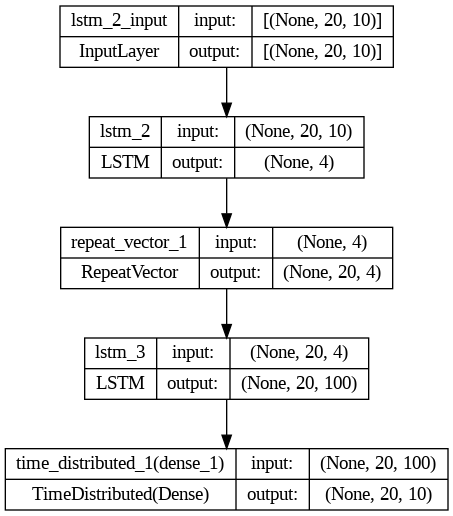

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
# connect the encoder LSTM as the output layer
model_feature = Model(inputs=model.inputs, outputs=model.layers[1].output)

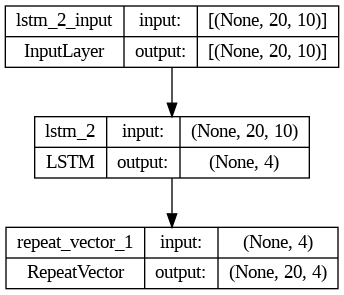

In [ ]:
plot_model(model_feature, show_shapes=True, show_layer_names=True)

In [ ]:
# get the feature vector for the input sequence
yhat = model_feature.predict(features_normalised)
print(yhat.shape)

72/72 [==============================] - 0s 5ms/step
(2302, 20, 4)


In [ ]:
# reshape the vector
features_reduced = yhat.reshape(-1,4)
features_reduced.shape

(46040, 4)

In [ ]:
# Copy original data frame and drop the original features
df_reduced = df.copy()
df_reduced = df_reduced .drop(feature_list, axis=1)
df_reduced

,date,tic,close,high,low,open,volume,cov_list
0,2009-04-23,AXP,43.101696,17.112569,15.545926,16.011902,37007800.0,"[[0.000400391297611211, 8.065103137623012e-05,..."
1,2009-04-23,DIS,36.511610,16.989492,16.498665,16.722551,14190400.0,"[[0.000400391297611211, 8.065103137623012e-05,..."
2,2009-04-23,HD,37.857197,18.317277,17.681552,18.135641,17975100.0,"[[0.000400391297611211, 8.065103137623012e-05,..."
3,2009-04-23,IBM,45.161830,59.257997,57.539869,59.183045,9874658.0,"[[0.000400391297611211, 8.065103137623012e-05,..."
4,2009-04-23,INTC,39.427460,10.121974,9.679659,10.051460,74517400.0,"[[0.000400391297611211, 8.065103137623012e-05,..."
...,...,...,...,...,...,...,...,...
46035,2018-06-13,TRV,91.714330,115.722647,114.316132,115.023810,1170200.0,"[[1.9557606351040886e-05, 3.5287272200116347e-..."
46036,2018-06-13,V,99.010550,130.786259,129.379845,130.217905,4881600.0,"[[1.9557606351040886e-05, 3.5287272200116347e-..."
46037,2018-06-13,VZ,91.381720,36.865840,35.977416,36.789907,30809400.0,"[[1.9557606351040886e-05, 3.5287272200116347e-..."
46038,2018-06-13,WMT,80.226940,77.058736,76.583793,76.620328,6358400.0,"[[1.9557606351040886e-05, 3.5287272200116347e-..."


In [ ]:
# convert the reduced features to a data frame and merge with the original data frame
features_reduced_df = pd.DataFrame(features_reduced, columns=['f01','f02','f03','f04'])
features_reduced_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,f01,f02,f03,f04
0,0.055829,0.606777,1.980398,0.998030
1,0.055829,0.606777,1.980398,0.998030
2,0.055829,0.606777,1.980398,0.998030
3,0.055829,0.606777,1.980398,0.998030
4,0.055829,0.606777,1.980398,0.998030
...,...,...,...,...
46035,4.731141,0.665300,0.452778,1.280707
46036,4.731141,0.665300,0.452778,1.280707
46037,4.731141,0.665300,0.452778,1.280707
46038,4.731141,0.665300,0.452778,1.280707


In [ ]:
df_reduced[['f01','f02','f03','f04']] = features_reduced_df[['f01','f02','f03','f04']]
df_reduced

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tic,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2009-04-23,AXP,43.101696,17.112569,15.545926,16.011902,37007800.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
1,2009-04-23,DIS,36.511610,16.989492,16.498665,16.722551,14190400.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
2,2009-04-23,HD,37.857197,18.317277,17.681552,18.135641,17975100.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
3,2009-04-23,IBM,45.161830,59.257997,57.539869,59.183045,9874658.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
4,2009-04-23,INTC,39.427460,10.121974,9.679659,10.051460,74517400.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
...,...,...,...,...,...,...,...,...,...,...,...,...
46035,2018-06-13,TRV,91.714330,115.722647,114.316132,115.023810,1170200.0,"[[1.9557606351040886e-05, 3.5287272200116347e-...",4.731141,0.665300,0.452778,1.280707
46036,2018-06-13,V,99.010550,130.786259,129.379845,130.217905,4881600.0,"[[1.9557606351040886e-05, 3.5287272200116347e-...",4.731141,0.665300,0.452778,1.280707
46037,2018-06-13,VZ,91.381720,36.865840,35.977416,36.789907,30809400.0,"[[1.9557606351040886e-05, 3.5287272200116347e-...",4.731141,0.665300,0.452778,1.280707
46038,2018-06-13,WMT,80.226940,77.058736,76.583793,76.620328,6358400.0,"[[1.9557606351040886e-05, 3.5287272200116347e-...",4.731141,0.665300,0.452778,1.280707


In [ ]:
data_df = df_reduced.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Split

In [ ]:
data_df

,date,tic,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2009-04-23,AXP,43.101696,17.112569,15.545926,16.011902,37007800.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
1,2009-04-23,DIS,36.511610,16.989492,16.498665,16.722551,14190400.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
2,2009-04-23,HD,37.857197,18.317277,17.681552,18.135641,17975100.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
3,2009-04-23,IBM,45.161830,59.257997,57.539869,59.183045,9874658.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
4,2009-04-23,INTC,39.427460,10.121974,9.679659,10.051460,74517400.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
...,...,...,...,...,...,...,...,...,...,...,...,...
46035,2018-06-13,TRV,91.714330,115.722647,114.316132,115.023810,1170200.0,"[[1.9557606351040886e-05, 3.5287272200116347e-...",4.731141,0.665300,0.452778,1.280707
46036,2018-06-13,V,99.010550,130.786259,129.379845,130.217905,4881600.0,"[[1.9557606351040886e-05, 3.5287272200116347e-...",4.731141,0.665300,0.452778,1.280707
46037,2018-06-13,VZ,91.381720,36.865840,35.977416,36.789907,30809400.0,"[[1.9557606351040886e-05, 3.5287272200116347e-...",4.731141,0.665300,0.452778,1.280707
46038,2018-06-13,WMT,80.226940,77.058736,76.583793,76.620328,6358400.0,"[[1.9557606351040886e-05, 3.5287272200116347e-...",4.731141,0.665300,0.452778,1.280707


In [ ]:
# Define the start and end dates for the train and test data

train_pct = 0.8 # percentage of train data
date_list = list(data_df.date.unique()) # List of dates in the data

date_list_len = len(date_list) # len of the date list
train_data_len = int(train_pct * date_list_len) # length of the train data

train_start_date = date_list[0]
train_end_date = date_list[train_data_len]

test_start_date = date_list[train_data_len+1]
test_end_date = date_list[-1]

print('Training Data: ', 'from ', train_start_date, ' to ', train_end_date)
print('Testing Data: ', 'from ', test_start_date, ' to ', test_end_date)

Training Data:  from  2009-04-23  to  2016-08-15
Testing Data:  from  2016-08-16  to  2018-06-13


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def data_split(df, start, end, target_date_col="date"):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df[target_date_col] >= start) & (df[target_date_col] < end)]
    data = data.sort_values([target_date_col, "tic"], ignore_index=True)
    data.index = data[target_date_col].factorize()[0]
    return data

# Split the whole dataset
train_df = data_split(data_df, train_start_date, train_end_date)
test_df = data_split(data_df, test_start_date, test_end_date)

# Split the Close Prices dataset
prices_train = df_close[df_close['date']<=train_end_date]
prices_test = df_close[df_close['date']>=test_start_date]

In [ ]:
train_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tic,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2009-04-23,AXP,43.101696,17.112569,15.545926,16.011902,37007800.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
0,2009-04-23,DIS,36.511610,16.989492,16.498665,16.722551,14190400.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
0,2009-04-23,HD,37.857197,18.317277,17.681552,18.135641,17975100.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
0,2009-04-23,IBM,45.161830,59.257997,57.539869,59.183045,9874658.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
0,2009-04-23,INTC,39.427460,10.121974,9.679659,10.051460,74517400.0,"[[0.000400391297611211, 8.065103137623012e-05,...",0.055829,0.606777,1.980398,0.998030
...,...,...,...,...,...,...,...,...,...,...,...,...
1840,2016-08-12,TRV,82.040016,100.474617,100.060413,100.237929,815700.0,"[[7.689573946622643e-05, 1.2268254572560687e-0...",3.725318,0.677685,1.479624,1.458712
1840,2016-08-12,V,73.228160,76.050165,75.641803,75.784256,4420400.0,"[[7.689573946622643e-05, 1.2268254572560687e-0...",3.725318,0.677685,1.479624,1.458712
1840,2016-08-12,VZ,90.245600,37.738640,37.417044,37.724657,7655000.0,"[[7.689573946622643e-05, 1.2268254572560687e-0...",3.725318,0.677685,1.479624,1.458712
1840,2016-08-12,WMT,68.230090,64.725976,64.236946,64.446533,9994200.0,"[[7.689573946622643e-05, 1.2268254572560687e-0...",3.725318,0.677685,1.479624,1.458712


# Deep Reinforcement Learning

In [ ]:
import time

from pypfopt.efficient_frontier import EfficientFrontier#, objective_functions
from pypfopt import risk_models
from pypfopt import expected_returns

from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv

from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)

from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3 import TD3
from stable_baselines3.td3.policies import MlpPolicy
from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)

from stable_baselines3 import SAC

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step


    """
    metadata = {'render.modes': ['human']}

    def __init__(self,
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                initial_weights,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.initial_weights = initial_weights

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,))

        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False
        self.turbulence_threshold = turbulence_threshold
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]

    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()

            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")

            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:


            #  norm_actions = actions
            weights = self.softmax_normalization(actions)
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data


            """
            # Get data frame of close prices
            # Reset the Index to tic and date
            df_prices = self.data.copy()
            df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
            tic_list = list(set([i for i,j in df_prices.index]))

            # Get all the Close Prices
            df_close = pd.DataFrame()
            for ticker in tic_list:
                series = df_prices.xs(ticker).close
                df_close[ticker] = series

            mu = expected_returns.mean_historical_return(df_close)
            Sigma = risk_models.sample_cov(df_close)
            ef = EfficientFrontier(mu,Sigma)

            raw_weights = ef.max_sharpe()
            weights = [j for i,j in raw_weights.items()]
            self.actions_memory.append(weights)
            last_day_memory = self.data

            """

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value
            #print("Step reward: ", self.reward)
            #self.reward = self.reward*self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False
        self.portfolio_return_memory = [0]

        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]
        return self.state

    def render(self, mode='human'):
        return self.state

    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output


    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']

        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def initial_weights(self, data_frame):
        # Get data frame of close prices
        # Reset the Index to tic and date
        df_prices = data_frame.copy()
        df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
        tic_list = list(set([i for i,j in df_prices.index]))

        # Get all the Close Prices
        df_close = pd.DataFrame()
        for ticker in tic_list:
            series = df_prices.xs(ticker).close
            df_close[ticker] = series

        mu = expected_returns.mean_historical_return(df_close)
        Sigma = risk_models.sample_cov(df_close)
        ef = EfficientFrontier(mu,Sigma, weight_bounds=(0.01, 1))

        raw_weights = ef.max_sharpe()
        initial_weights = [j for i,j in raw_weights.items()]

        return initial_weights

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [ ]:
MODELS = {"a2c": A2C, "ddpg": DDPG, "td3": TD3, "sac": SAC, "ppo": PPO}

NOISE = {
    "normal": NormalActionNoise,
    "ornstein_uhlenbeck": OrnsteinUhlenbeckActionNoise,
}


class DRLAgent:
    """Provides implementations for DRL algorithms

    Attributes
    ----------
        env: gym environment class
            user-defined class

    Methods
    -------
    train_PPO()
        the implementation for PPO algorithm
    train_A2C()
        the implementation for A2C algorithm
    train_DDPG()
        the implementation for DDPG algorithm
    train_TD3()
        the implementation for TD3 algorithm
    train_SAC()
        the implementation for SAC algorithm
    DRL_prediction()
        make a prediction in a test dataset and get results
    """

    @staticmethod
    def DRL_prediction(model, test_data, test_env, test_obs):
        """make a prediction"""
        start = time.time()
        account_memory = []
        actions_memory = []
        for i in range(len(test_data.index.unique())):
            action, _states = model.predict(test_obs)
            test_obs, rewards, dones, info = test_env.step(action)
            if i == (len(test_data.index.unique()) - 2):
                account_memory = test_env.env_method(method_name="save_asset_memory")
                actions_memory = test_env.env_method(method_name="save_action_memory")
        end = time.time()
        return account_memory[0], actions_memory[0]

    def __init__(self, env):
        self.env = env

    def get_model(
        self,
        model_name,
        policy="MlpPolicy",
        policy_kwargs=None,
        model_kwargs=None,
        verbose=1,
    ):
        if model_name not in MODELS:
            raise NotImplementedError("NotImplementedError")

        if model_kwargs is None:
            print("No.")

        if "action_noise" in model_kwargs:
            n_actions = self.env.action_space.shape[-1]
            model_kwargs["action_noise"] = NOISE[model_kwargs["action_noise"]](
                mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions)
            )
        print(model_kwargs)
        model = MODELS[model_name](
            policy=policy,
            env=self.env,
            tensorboard_log=f"{TENSORBOARD_LOG_DIR}/{model_name}",
            verbose=verbose,
            policy_kwargs=policy_kwargs,
            **model_kwargs,
        )
        return model

    def train_model(self, model, tb_log_name, total_timesteps=5000):
        model = model.learn(total_timesteps=total_timesteps, tb_log_name=tb_log_name)
        return model

In [ ]:
stock_dimension = len(train_df.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 20, State Space: 20


In [ ]:
weights_initial = [1/stock_dimension]*stock_dimension

env_kwargs = {
    "hmax": 500,
    "initial_amount": 1000000,
    "transaction_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": ['f01','f02','f03','f04'],
    "action_space": stock_dimension,
    "reward_scaling": 0,
    'initial_weights': [1/stock_dimension]*stock_dimension
}

e_train_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


## A2C

In [ ]:
# initialize
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cuda device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c,
                                tb_log_name='a2c',
                                total_timesteps=50000)

Logging to tensorboard_log/a2c/a2c_2
-------------------------------------
| time/                 |           |
|    fps                | 242       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -28.3     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0002    |
|    n_updates          | 99        |
|    policy_loss        | 1.07e+08  |
|    std                | 0.998     |
|    value_loss         | 1.78e+13  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 258      |
|    iterations         | 200      |
|    time_elapsed       | 3        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -28.3    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates         

In [ ]:
# A2C Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_train_daily_return, a2c_train_weights = DRLAgent.DRL_prediction(model=trained_a2c,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:2311909.8009515894
Sharpe:  1.7767266888164097


In [ ]:
a2c_train_daily_return

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,daily_return
0,2009-04-23,0.000000
1,2009-04-24,0.002411
2,2009-04-27,0.007702
3,2009-04-28,0.002552
4,2009-04-29,0.007681
...,...,...
1836,2016-08-08,-0.000132
1837,2016-08-09,0.001170
1838,2016-08-10,0.001147
1839,2016-08-11,-0.000669


In [ ]:
a2c_train_weights

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AXP,DIS,HD,IBM,INTC,JNJ,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,V,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,
2009-04-23,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
2009-04-24,0.032564,0.032564,0.032564,0.088518,0.032564,0.040043,0.032564,0.088518,0.032564,0.088518,0.074131,0.033142,0.032564,0.061858,0.048581,0.088518,0.032564,0.033195,0.061901,0.032564
2009-04-27,0.030386,0.030386,0.082597,0.082597,0.030386,0.030386,0.051293,0.030386,0.038390,0.030386,0.082597,0.082597,0.045148,0.059867,0.076207,0.030386,0.082597,0.030386,0.030386,0.042640
2009-04-28,0.032652,0.032652,0.079979,0.032652,0.042867,0.060311,0.039424,0.032652,0.039136,0.032652,0.072907,0.033265,0.032652,0.088757,0.032652,0.054737,0.082855,0.088757,0.055792,0.032652
2009-04-29,0.044077,0.037388,0.049470,0.037388,0.037388,0.037388,0.037388,0.063433,0.037388,0.056353,0.037388,0.101632,0.037388,0.037388,0.037388,0.037388,0.037388,0.037388,0.101632,0.097352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-08,0.031078,0.031078,0.084478,0.084478,0.037750,0.031078,0.031078,0.042898,0.084478,0.031078,0.069320,0.031078,0.031078,0.031078,0.031608,0.031078,0.039724,0.084478,0.076610,0.084478
2016-08-09,0.047388,0.029557,0.035305,0.080344,0.033764,0.075868,0.029557,0.029557,0.079342,0.029557,0.080344,0.033123,0.080344,0.029557,0.029557,0.029557,0.067691,0.044599,0.054644,0.080344
2016-08-10,0.030328,0.030328,0.082441,0.082441,0.082441,0.031762,0.047152,0.030328,0.082441,0.030328,0.082441,0.030328,0.030328,0.030328,0.030328,0.030328,0.030328,0.082441,0.040713,0.082441


In [ ]:
# A2C Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_test_daily_return, a2c_test_weights = DRLAgent.DRL_prediction(model=trained_a2c,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)
a2c_test_daily_return

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1142803.481953699
Sharpe:  1.7596549461106596


,date,daily_return
0,2016-08-16,0.000000
1,2016-08-17,-0.001790
2,2016-08-18,-0.001885
3,2016-08-19,0.001217
4,2016-08-22,-0.000049
...,...,...
454,2018-06-06,0.002916
455,2018-06-07,0.002511
456,2018-06-08,0.001296
457,2018-06-11,0.000481


In [ ]:
a2c_test_weights

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AXP,DIS,HD,IBM,INTC,JNJ,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,V,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,
2016-08-16,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
2016-08-17,0.083784,0.030822,0.083784,0.040303,0.030822,0.031486,0.030822,0.030822,0.083784,0.030822,0.083784,0.068583,0.071535,0.030822,0.030822,0.030822,0.030822,0.030822,0.083784,0.060949
2016-08-18,0.032363,0.034788,0.063418,0.032363,0.035108,0.034824,0.032363,0.032363,0.087971,0.064267,0.055932,0.032363,0.068514,0.032363,0.032363,0.032363,0.087971,0.087971,0.032363,0.087971
2016-08-19,0.035970,0.034975,0.083640,0.079926,0.034975,0.049012,0.034975,0.034975,0.087785,0.034975,0.063397,0.034975,0.067253,0.034975,0.034975,0.034975,0.053219,0.034975,0.034975,0.095072
2016-08-22,0.030822,0.030822,0.083784,0.072565,0.030822,0.053674,0.030822,0.030822,0.083784,0.030822,0.030822,0.035998,0.030822,0.030822,0.083784,0.030822,0.083784,0.083784,0.037083,0.073536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06,0.033796,0.033796,0.091867,0.035322,0.041163,0.042398,0.033796,0.033796,0.066057,0.033796,0.052381,0.033796,0.068384,0.037458,0.091867,0.033796,0.033796,0.077069,0.033796,0.091867
2018-06-07,0.037461,0.028667,0.034171,0.077924,0.077924,0.077924,0.028667,0.028667,0.028667,0.028667,0.074412,0.028667,0.077924,0.077924,0.028667,0.077924,0.028667,0.050487,0.028667,0.077924
2018-06-08,0.044558,0.034060,0.034060,0.052325,0.034060,0.092584,0.034060,0.034060,0.092584,0.058518,0.034060,0.034060,0.047092,0.048662,0.037383,0.034060,0.092584,0.048832,0.071773,0.040628


## DDPG

In [ ]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}


model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cuda device


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=50000)

Logging to tensorboard_log/ddpg/ddpg_2
begin_total_asset:1000000
end_total_asset:2316449.771653179
Sharpe:  1.791994034721809
begin_total_asset:1000000
end_total_asset:2329423.3012492014
Sharpe:  1.7199445984039072
begin_total_asset:1000000
end_total_asset:2329423.3012492014
Sharpe:  1.7199445984039072
begin_total_asset:1000000
end_total_asset:2329423.3012492014
Sharpe:  1.7199445984039072
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 143       |
|    time_elapsed    | 51        |
|    total_timesteps | 7364      |
| train/             |           |
|    actor_loss      | -3.85e+07 |
|    critic_loss     | 1.19e+13  |
|    learning_rate   | 0.001     |
|    n_updates       | 5523      |
----------------------------------
begin_total_asset:1000000
end_total_asset:2329423.3012492014
Sharpe:  1.7199445984039072
begin_total_asset:1000000
end_total_asset:2329423.3012492014
Sharpe:  1.7199445984039072
begin_tot

In [ ]:
# DDPG Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_train_daily_return, ddpg_train_weights = DRLAgent.DRL_prediction(model=trained_ddpg,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:2329423.3012492014
Sharpe:  1.7199445984039072


In [ ]:
# DDPG Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_test_daily_return, ddpg_test_weights = DRLAgent.DRL_prediction(model=trained_ddpg,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1134161.4706147576
Sharpe:  1.682707569040048


# Evaluation

Uniform weights portfolio

In [ ]:
n_assets = len(list_of_stocks) # Number of assets

uniform_weights = np.ones((n_assets))/n_assets

uniform_weights_port = pd.DataFrame([uniform_weights], columns = list_of_stocks)

uniform_weights_port

,JNJ,PG,MMM,KO,IBM,VZ,MCD,PFE,RTX,WMT,MRK,V,DIS,MSFT,XOM,HD,TRV,INTC,AXP,NKE
0,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


In [ ]:
prices_train = prices_train.set_index(['date'])
prices_test = prices_test.set_index(['date'])

## Train data

In [ ]:
returns_train = prices_train.pct_change() # get the assets daily returns
returns_test = prices_test.pct_change()

# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_returns = returns_train.dot(uw_weights)
uw_cum_returns = (1 + uw_returns).cumprod()
uw_cum_returns.name = "uniform weights"

a2c_train_cum_returns = (1 + a2c_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
a2c_train_cum_returns = a2c_train_cum_returns['daily_return']
a2c_train_cum_returns.name = 'a2c Model GAN'

ddpg_train_cum_returns = (1 + ddpg_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_train_cum_returns = ddpg_train_cum_returns['daily_return']
ddpg_train_cum_returns.name = 'ddpg Model GAN'

date_list = list(a2c_train_cum_returns.index)

uw_cum_returns = uw_cum_returns[(uw_cum_returns.index).isin (date_list)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import matplotlib.pylab as plt

# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
uw_cum_returns.plot(ax=ax, color="black", alpha=0.4)
a2c_train_cum_returns.plot(ax=ax, color='blue', alpha=0.4)
ddpg_train_cum_returns.plot(ax=ax, color='purple', alpha=0.4)

plt.legend(loc="best")
plt.grid(True)
ax.set_ylabel("cummulative return")
ax.set_title("Backtest based on train data", fontsize=14)
fig.savefig('results/back_test_on_train_data.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Run if execute GAN after original

In [ ]:
# save plots seperately before executing GAN
a2c_train_cum_returns1 = a2c_train_cum_returns.copy()
ddpg_train_cum_returns1 = ddpg_train_cum_returns.copy()

In [ ]:
a2c_train_cum_returns.name = 'a2c Model GAN'
ddpg_train_cum_returns.name = 'ddpg Model GAN'

In [ ]:
date_list = list(a2c_train_cum_returns1.index)

uw_cum_returns = uw_cum_returns[(uw_cum_returns.index).isin (date_list)]

In [ ]:
import matplotlib.pylab as plt

# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
#uw_cum_returns.plot(ax=ax, color="black", alpha=0.4)
a2c_train_cum_returns1.plot(ax=ax, color='red', alpha=0.4)
ddpg_train_cum_returns1.plot(ax=ax, color='green', alpha=0.4)
#a2c_train_cum_returns.plot(ax=ax, color='blue', alpha=0.4)
#ddpg_train_cum_returns.plot(ax=ax, color='purple', alpha=0.4)

plt.legend(loc="best")
plt.grid(True)
ax.set_ylabel("cummulative return")
ax.set_title("Backtest based on train data", fontsize=14)
fig.savefig('results/back_test_on_train_data.png')
plt.show()

## Test data

In [ ]:
returns_test = prices_test.pct_change()

# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_test_returns = returns_test.dot(uw_weights)
uw_test_cum_returns = (1 + uw_test_returns).cumprod()
uw_test_cum_returns.name = "uniform weights"

a2c_test_cum_returns = (1 + a2c_test_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
a2c_test_cum_returns = a2c_test_cum_returns['daily_return']
a2c_test_cum_returns.name = 'a2c Model GAN'

ddpg_test_cum_returns = (1 + ddpg_test_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_test_cum_returns = ddpg_test_cum_returns['daily_return']
ddpg_test_cum_returns.name = 'ddpg Model GAN'

date_list = list(a2c_test_cum_returns.index)

#uw_cum_returns = uw_cum_returns[(uw_cum_returns.index).isin(date_list)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fig_test, ax_test = plt.subplots(figsize=(8,4))
uw_test_cum_returns.plot(ax=ax_test, color="black", alpha=0.4)
a2c_test_cum_returns.plot(ax=ax_test, color='blue', alpha=0.4)
ddpg_test_cum_returns.plot(ax=ax_test, color='purple', alpha=0.4)

plt.legend(loc="best")
plt.grid(True)
ax_test.set_ylabel("cummulative return")
ax_test.set_title("Backtest based on test data", fontsize=14)
fig_test.savefig('results/back_test_on_test_data.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Run if execute GAN after original

In [ ]:
# save plots seperately before executing GAN
a2c_test_cum_returns1 = a2c_test_cum_returns.copy()
ddpg_test_cum_returns1 = ddpg_test_cum_returns.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
a2c_test_cum_returns.name = 'a2c Model GAN'
ddpg_test_cum_returns.name = 'ddpg Model GAN'

In [ ]:
import matplotlib.pylab as plt

# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
uw_test_cum_returns.plot(ax=ax, color="black", alpha=0.4)
a2c_test_cum_returns1.plot(ax=ax, color='red', alpha=0.4)
ddpg_test_cum_returns1.plot(ax=ax, color='green', alpha=0.4)
a2c_test_cum_returns.plot(ax=ax, color='blue', alpha=0.4)
ddpg_test_cum_returns.plot(ax=ax, color='purple', alpha=0.4)

plt.legend(loc="best")
plt.grid(True)
ax.set_ylabel("cummulative return")
ax.set_title("Backtest based on test data", fontsize=14)
fig.savefig('results/back_test_on_test_data.png')
plt.show()

# GAN Implementation


Use data with features to generate data at hourly intervals

In [ ]:
data_with_features["pct_change"] = (data_with_features["close"] - data_with_features["close"].shift(1))/ data_with_features["close"].shift(1)
data_with_features["log_change"] = np.log(data_with_features["close"]/ data_with_features["close"].shift(1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class Generator():
    def __init__(self):
        pass

    def SMA(self, data, windows):
        res = data.rolling(window = windows).mean()
        return res

    def EMA(self, data, windows):
        res = data.ewm(span = windows).mean()
        return res

    def MACD(self, data, long, short, windows):
        short_ = data.ewm(span = short).mean()
        long_ = data.ewm(span = long).mean()
        macd_ = short_ - long_
        res = macd_.ewm(span = windows).mean()
        return res

    def RSI(self, data, windows):
        delta = data.diff(1)
        up = delta.copy()
        down = delta.copy()
        up[up < 0] = 0
        down[down > 0] = 0
        avg_up = up.rolling(window = windows).mean()
        avg_down = down.rolling(window = windows).mean()
        rs = avg_up/ avg_down
        rsi = 100. -(100./ (1. + rs))
        return rsi

    def atr(self, data_high, data_low, windows):
        range_ = data_high - data_low
        res = range_.rolling(window = windows).mean()
        return res

    def bollinger_band(self, data, windows):
        sma = data.rolling(window = windows).mean()
        std = data.rolling(window = windows).std()
        upper = sma + 2 * std
        lower = sma - 2 * std
        return upper, lower

    def rsv(self, data, windows):
        min_ = data.rolling(window = windows).min()
        max_ = data.rolling(window = windows).max()
        res = (data - min_)/ (max_ - min_) * 100
        return res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Generator = Generator()

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
tic_values = pd.unique(data_with_features["tic"])
i = 0
df_dict = {}
for tic_val in tic_values:
  i += 1
  data_tic = data_with_features.loc[data_with_features["tic"] == tic_val]
  data_tic['7ma'] = Generator.EMA(data_tic['close'], 7)
  data_tic['14ma'] = Generator.EMA(data_tic['close'], 14)
  data_tic['21ma'] = Generator.EMA(data_tic['close'], 21)
  data_tic['7macd'] = Generator.MACD(data_tic['close'], 3, 11, 7)
  data_tic['14macd'] = Generator.MACD(data_tic['close'], 7, 21, 14)
  data_tic['7rsi'] = Generator.RSI(data_tic['close'], 7)
  data_tic['14rsi'] = Generator.RSI(data_tic['close'], 14)
  data_tic['21rsi'] = Generator.RSI(data_tic['close'], 21)
  data_tic['7atr'] = Generator.atr(data_tic['high'], data_tic['low'], 7)
  data_tic['14atr'] = Generator.atr(data_tic['high'], data_tic['low'], 14)
  data_tic['21atr'] = Generator.atr(data_tic['high'], data_tic['low'], 21)
  data_tic['7upper'], data_tic['7lower'] = Generator.bollinger_band(data_tic['close'], 7)
  data_tic['14upper'], data_tic['14lower'] = Generator.bollinger_band(data_tic['close'], 14)
  data_tic['21upper'], data_tic['21lower'] = Generator.bollinger_band(data_tic['close'], 21)
  data_tic['7rsv'] = Generator.rsv(data_tic['close'], 7)
  data_tic['14rsv'] = Generator.rsv(data_tic['close'], 14)
  data_tic['21rsv'] = Generator.rsv(data_tic['close'], 21)
  data_tic = data_tic.dropna()
  df_dict["df{0}".format(i)] = data_tic

data_complete = pd.concat(df_dict.values())
data_complete

,date,tic,close,high,low,open,volume,atr,bbw,obv,...,21atr,7upper,7lower,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv
444,2008-04-21,RTX,31.010984,31.118528,30.800202,30.963666,5756788.0,19.096836,197.004278,-2.220046e+09,...,0.584008,31.686673,29.567146,31.454794,29.893666,31.456248,29.440738,82.579387,82.579387,86.763626
468,2008-04-22,RTX,30.731380,30.929259,30.507691,30.821715,6505684.0,18.507785,200.500951,-2.210269e+09,...,0.573356,31.594696,29.893877,31.462661,29.901776,31.482065,29.459987,54.923465,61.612550,70.832790
489,2008-04-23,RTX,30.912048,31.118531,30.559308,30.907746,7204049.0,18.497453,208.093868,-2.256160e+09,...,0.578477,31.499606,30.218799,31.492033,29.940002,31.525239,29.486458,58.150900,75.160405,81.126601
501,2008-04-24,RTX,31.273411,31.458384,30.869050,30.972291,7180850.0,19.823050,182.377458,-2.292134e+09,...,0.592201,31.577022,30.369993,31.575238,29.916408,31.606962,29.531329,100.000000,100.000000,100.000000
527,2008-04-25,RTX,31.264791,31.449765,31.010990,31.402444,5399740.0,23.870961,217.035992,-2.484754e+09,...,0.586261,31.586681,30.366475,31.646024,29.900314,31.662723,29.609536,98.950970,99.367931,99.517186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64326,2020-12-24,WMT,137.487122,138.339829,137.180523,137.525439,3018200.0,87.844226,199.990682,-2.989887e+11,...,1.871160,141.215974,136.460086,142.963364,136.780308,146.474232,136.172480,9.722622,4.924847,3.106591
64357,2020-12-28,WMT,139.135025,139.211675,137.324220,138.004462,6448300.0,86.454410,203.567464,-2.990004e+11,...,1.907399,141.163878,136.454696,142.695371,136.726574,146.002315,136.091708,69.443584,35.175599,22.188749
64361,2020-12-29,WMT,138.253571,139.738626,137.573314,139.537419,5979400.0,94.011062,216.837098,-2.990283e+11,...,1.936868,140.697356,136.428472,141.934438,136.857114,145.537205,135.941091,39.272146,23.946353,11.981808
64399,2020-12-30,WMT,138.138596,139.067952,137.908661,138.809276,6250400.0,73.956948,209.208168,-2.991009e+11,...,1.862519,140.143847,136.497445,141.446809,136.858846,144.681377,136.062055,34.908381,25.130285,10.830006


In [ ]:
data_features_modified = data_complete

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a unique graph for each tic value
tic_values = pd.unique(data_features_modified["tic"])
print(tic_values)
for tic_val in tic_values:
  data_tic = data_features_modified.loc[data_features_modified["tic"] == tic_val]
  x_ = np.arange(data_tic.shape[0])
  plt.figure(figsize=(12, 6))
  plt.plot(data_tic['7ma'].values, label = 'MA 7', color = 'purple', linestyle = '--')
  plt.plot(data_tic['close'].values, label = 'Closing price', color = 'b')
  plt.plot(data_tic['21ma'].values, label = 'MA 21', color = 'r', linestyle = '--')
  plt.plot(data_tic['7upper'].values, label = 'Upper Bound', color = 'c')
  plt.plot(data_tic['7lower'].values, label = 'Lower Bound', color = 'c')
  plt.fill_between(x_, data_tic['7lower'].values, data_tic['7upper'].values, alpha = 0.35)
  plt.title('Technical indicators for stock ' + tic_val)
  plt.ylabel('TWD')
  plt.xlabel('Days')
  plt.legend()

['RTX' 'VZ' 'MSFT' 'DIS' 'XOM' 'AXP' 'PFE' 'PG' 'JNJ' 'MRK' 'TRV' 'KO'
 'NKE' 'HD' 'V' 'MMM' 'IBM' 'MCD' 'INTC' 'WMT']


<ipython-input-72-6e26bced7327>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


GAN Implementation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error
import math

In [ ]:
data_features_modified.to_csv('./data.csv', index=False)
data = pd.read_csv('./data.csv', index_col = 'date')
data

,tic,close,high,low,open,volume,atr,bbw,obv,cmf,...,21atr,7upper,7lower,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv
date,,,,,,,,,,,,,,,,,,,,,
2008-04-21,RTX,31.010984,31.118528,30.800202,30.963666,5756788.0,19.096836,197.004278,-2.220046e+09,0.249896,...,0.584008,31.686673,29.567146,31.454794,29.893666,31.456248,29.440738,82.579387,82.579387,86.763626
2008-04-22,RTX,30.731380,30.929259,30.507691,30.821715,6505684.0,18.507785,200.500951,-2.210269e+09,0.055374,...,0.573356,31.594696,29.893877,31.462661,29.901776,31.482065,29.459987,54.923465,61.612550,70.832790
2008-04-23,RTX,30.912048,31.118531,30.559308,30.907746,7204049.0,18.497453,208.093868,-2.256160e+09,-0.108842,...,0.578477,31.499606,30.218799,31.492033,29.940002,31.525239,29.486458,58.150900,75.160405,81.126601
2008-04-24,RTX,31.273411,31.458384,30.869050,30.972291,7180850.0,19.823050,182.377458,-2.292134e+09,0.425198,...,0.592201,31.577022,30.369993,31.575238,29.916408,31.606962,29.531329,100.000000,100.000000,100.000000
2008-04-25,RTX,31.264791,31.449765,31.010990,31.402444,5399740.0,23.870961,217.035992,-2.484754e+09,0.222600,...,0.586261,31.586681,30.366475,31.646024,29.900314,31.662723,29.609536,98.950970,99.367931,99.517186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,WMT,137.487122,138.339829,137.180523,137.525439,3018200.0,87.844226,199.990682,-2.989887e+11,-0.182943,...,1.871160,141.215974,136.460086,142.963364,136.780308,146.474232,136.172480,9.722622,4.924847,3.106591
2020-12-28,WMT,139.135025,139.211675,137.324220,138.004462,6448300.0,86.454410,203.567464,-2.990004e+11,-0.000340,...,1.907399,141.163878,136.454696,142.695371,136.726574,146.002315,136.091708,69.443584,35.175599,22.188749
2020-12-29,WMT,138.253571,139.738626,137.573314,139.537419,5979400.0,94.011062,216.837098,-2.990283e+11,-0.158844,...,1.936868,140.697356,136.428472,141.934438,136.857114,145.537205,135.941091,39.272146,23.946353,11.981808


In [ ]:
# Create individual data sets for each stock index, then drop the tic and unnamed columns
stock_df_dict = {}
tic_values = pd.unique(data["tic"])
for tic_val in tic_values:
    data_tic = data.loc[data["tic"] == tic_val]
    data_tic = data_tic.drop("tic", axis = 1)
    data_tic = data_tic.drop("obv", axis = 1)
    data_tic = data_tic.drop("7rsi", axis = 1)
    data_tic = data_tic.drop("14rsi", axis = 1)
    data_tic = data_tic.drop("21rsi", axis = 1)
    stock_df_dict[tic_val] = data_tic

stock_df_dict.keys()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['RTX', 'VZ', 'MSFT', 'DIS', 'XOM', 'AXP', 'PFE', 'PG', 'JNJ', 'MRK', 'TRV', 'KO', 'NKE', 'HD', 'V', 'MMM', 'IBM', 'MCD', 'INTC', 'WMT'])

In [ ]:
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )

        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        )

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class Generator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.gru_1 = nn.GRU(input_size, 1024, batch_first = True)
        self.gru_2 = nn.GRU(1024, 512, batch_first = True)
        self.gru_3 = nn.GRU(512, 256, batch_first = True)
        self.linear_1 = nn.Linear(256, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        use_cuda = 1
        device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
        h0 = torch.zeros(1, x.size(0), 1024).to(device)
        out_1, _ = self.gru_1(x, h0)
        out_1 = self.dropout(out_1)
        h1 = torch.zeros(1, x.size(0), 512).to(device)
        out_2, _ = self.gru_2(out_1, h1)
        out_2 = self.dropout(out_2)
        h2 = torch.zeros(1, x.size(0), 256).to(device)
        out_3, _ = self.gru_3(out_2, h2)
        out_3 = self.dropout(out_3)
        out_4 = self.linear_1(out_3[:, -1, :])
        out_5 = self.linear_2(out_4)
        out = self.linear_3(out_5)
        return out
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4, 32, kernel_size = 3, stride = 1, padding = 'same')
        self.conv2 = nn.Conv1d(32, 64, kernel_size = 3, stride = 1, padding = 'same')
        self.conv3 = nn.Conv1d(64, 128, kernel_size = 3, stride = 1, padding = 'same')
        self.linear1 = nn.Linear(128, 220)
        self.batch1 = nn.BatchNorm1d(220)
        self.linear2 = nn.Linear(220, 220)
        self.batch2 = nn.BatchNorm1d(220)
        self.linear3 = nn.Linear(220, 1)
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1 = self.leaky(conv1)
        conv2 = self.conv2(conv1)
        conv2 = self.leaky(conv2)
        conv3 = self.conv3(conv2)
        conv3 = self.leaky(conv3)
        flatten_x = conv3.reshape(conv3.shape[0], conv3.shape[1])
        out_1 = self.linear1(flatten_x)
        out_1 = self.leaky(out_1)
        out_2 = self.linear2(out_1)
        out_2 = self.relu(out_2)
        out_3 = self.linear3(out_2)
        out = self.sigmoid(out_3)
        return out

In [ ]:
train_dict = {}
test_dict = {}

for tic in stock_df_dict.items():
  tic[1]['y'] = tic[1]['close']
  print(tic[1].columns.to_series()[np.isinf(tic[1]).any()])
  x = tic[1].iloc[:, :33].values
  y = tic[1].iloc[:, 33].values

  split = int(tic[1].shape[0]* 0.8)
  train_x, test_x = x[: split, :], x[split:, :]
  train_y, test_y = y[: split, ], y[split: , ]

  print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
  print(f'testX: {test_x.shape} testY: {test_y.shape}')

  x_scaler = MinMaxScaler(feature_range = (0, 1))
  y_scaler = MinMaxScaler(feature_range = (0, 1))

  train_x = x_scaler.fit_transform(train_x)
  test_x = x_scaler.transform(test_x)

  train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
  test_y = y_scaler.transform(test_y.reshape(-1, 1))

  train_dict[tic[0]] = (train_x, train_y)
  test_dict[tic[0]] = (test_x, test_y)

train_dict
test_dict

Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) testY: (640,)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) testY: (640,)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) testY: (640,)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) testY: (640,)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) testY: (640,)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) testY: (640,)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) testY: (640,)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) testY: (640,)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) testY: (640,)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) testY: (640,)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559,)
testX: (640, 33) te

{'RTX': (array([[0.88999142, 0.89983156, 0.90080692, ..., 0.        , 0.06864799,
          0.06864799],
         [0.89289782, 0.88736104, 0.90023658, ..., 0.11071812, 0.09936339,
          0.16119028],
         [0.87527272, 0.8823916 , 0.8860694 , ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.83206221, 0.8352777 , 0.83433196, ..., 0.74148684, 0.25407697,
          0.20841056],
         [0.84822248, 0.84383433, 0.84509769, ..., 1.        , 0.56568206,
          0.40343961],
         [0.85059924, 0.84478526, 0.85473903, ..., 1.        , 0.62088271,
          0.43212345]]),
  array([[0.88999142],
         [0.89289782],
         [0.87527272],
         [0.88830397],
         [0.88586609],
         [0.89552295],
         [0.88352274],
         [0.88577285],
         [0.88980404],
         [0.88980404],
         [0.88877287],
         [0.88905401],
         [0.89327284],
         [0.90527292],
         [0.90883534],
         [0.88839798],
         [0.91155422]

In [ ]:
model_dict = {}

for item in train_dict.items():

  train_loader = DataLoader(TensorDataset(torch.from_numpy(item[1][0]).float()), batch_size = 128, shuffle = False)
  model = VAE([33, 400, 400, 400, 10], 10)
  use_cuda = 1
  device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
  num_epochs = 300
  learning_rate = 0.00003
  model = model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

  hist = np.zeros(num_epochs)
  for epoch in range(num_epochs):
      total_loss = 0
      loss_ = []
      for (x, ) in train_loader:
        x = x.to(device)
        output, z, mu, logVar = model(x)
        kl_divergence = 0.5* torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
        loss = F.binary_cross_entropy(output, x) + kl_divergence
        loss.backward()
        optimizer.step()
        loss_.append(loss.item())
      hist[epoch] = sum(loss_)
      print('[{}/{}] Loss:'.format(epoch+1, num_epochs), sum(loss_))

  plt.figure(figsize=(12, 6))
  plt.plot(hist)
  model_dict[item[0]] = model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
[101/300] Loss: 44.327927589416504
[102/300] Loss: 44.14340806007385
[103/300] Loss: 43.90095496177673
[104/300] Loss: 43.54188776016235
[105/300] Loss: 43.02587008476257
[106/300] Loss: 42.3325777053833
[107/300] Loss: 41.466554403305054
[108/300] Loss: 40.452215790748596
[109/300] Loss: 39.347301959991455
[110/300] Loss: 38.218552231788635
[111/300] Loss: 37.13847577571869
[112/300] Loss: 36.17846930027008
[113/300] Loss: 35.39542305469513
[114/300] Loss: 34.83295023441315
[115/300] Loss: 34.51941156387329
[116/300] Loss: 34.45819437503815
[117/300] Loss: 34.62136995792389
[118/300] Loss: 34.96052062511444
[119/300] Loss: 35.393898367881775
[120/300] Loss: 35.83708953857422
[121/300] Loss: 36.198376059532166
[122/300] Loss: 36.39935290813446
[123/300] Loss: 36.37045240402222
[124/300] Loss: 36.09754502773285
[125/300] Loss: 35.58497154712677
[126/300] Loss: 34.89168345928192
[127/300] Loss: 34.103463530540466
[128/300] Loss: 33.32199

In [ ]:
print(model_dict)

{'RTX': VAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Linear(in_features=33, out_features=400, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=400, out_features=400, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=400, out_features=400, bias=True)
      (1): ReLU()
    )
    (3): Sequential(
      (0): Linear(in_features=400, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (fc_mu): Linear(in_features=10, out_features=10, bias=True)
  (fc_var): Linear(in_features=10, out_features=10, bias=True)
  (decoder_input): Linear(in_features=10, out_features=10, bias=True)
  (decoder): Sequential(
    (0): Sequential(
      (0): Linear(in_features=10, out_features=400, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=400, out_features=400, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=400, out_features=400, bias=True)
  

In [ ]:
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    for i in range(window, x.shape[0]):
        tmp_x = x[i - window: i, :]
        tmp_y = y[i]
        tmp_y_gan = y[i - window: i + 1]
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan
